# **Mukesh Magar**

# **Supply Chain Business Model**

**Importing Libraries**

In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np

# importing Data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Importing warinings libraires
import warnings
warnings.filterwarnings("ignore")

# importing loggins 
import logging
logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='app.log',
    format='%(asctime)s - %(levelname)s - %(message)s'

)

# Loading Data 

In [2]:
url="https://raw.githubusercontent.com/mukeshmagar543/SupplyChain_BusinessModel/refs/heads/main/research/SCM.csv"
df=pd.read_csv(url)
df.sample(frac=1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
7003,WH_107003,EID_57003,Urban,Mid,West,Zone 3,6,0,6,4508,...,1,222,42.0,2007.0,24,1,A+,4,19,30129
4121,WH_104121,EID_54121,Rural,Mid,South,Zone 2,0,1,2,2956,...,1,203,24.0,NaN,21,0,A,5,32,27066
8270,WH_108270,EID_58270,Urban,Large,North,Zone 6,2,1,4,6020,...,1,160,31.0,NaN,9,0,B,1,7,11057
16378,WH_116378,EID_66378,Rural,Large,North,Zone 6,2,0,3,6299,...,1,204,36.0,NaN,20,1,A+,5,29,26117
5985,WH_105985,EID_55985,Urban,Large,North,Zone 5,1,0,4,8562,...,1,237,32.0,NaN,25,1,A+,3,24,33118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13031,WH_113031,EID_63031,Rural,Small,North,Zone 1,1,0,6,5104,...,0,141,26.0,NaN,25,0,A,2,3,34089
1261,WH_101261,EID_51261,Rural,Mid,West,Zone 4,8,0,4,4285,...,1,62,30.0,2020.0,10,0,B+,2,26,13098
19496,WH_119496,EID_69496,Rural,Large,North,Zone 5,6,4,2,3545,...,0,209,35.0,2014.0,9,0,B+,5,24,10095
14040,WH_114040,EID_64040,Rural,Mid,North,Zone 4,2,1,4,6393,...,1,139,21.0,NaN,9,0,B,5,26,11132


In [3]:
df.shape

(22150, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [5]:
df.isnull().sum()/len(df)*100

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

# Spliting data into numeric_data and Categorical data

**numerical_data**

In [6]:
# Spliting data into 
numeric_data=df.select_dtypes(exclude='object')
numeric_data

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,NaN,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


**categorical data**

In [7]:
Categorical_data=df.select_dtypes(include='object')
Categorical_data


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [8]:
from collections import OrderedDict
import pandas as pd

stats = []

# Loop only through numerical_df
for col in numeric_data.columns:
    numerical_stats = OrderedDict({
        'Feature': col,
        'Minimum': numeric_data[col].min(),
        'Maximum': numeric_data[col].max(),
        'Mean': numeric_data[col].mean(),
        '25%': numeric_data[col].quantile(0.25),
        '75%': numeric_data[col].quantile(0.75),
        'IQR': numeric_data[col].quantile(0.75) - numeric_data[col].quantile(0.25),
        'Standard Deviation': numeric_data[col].std(),
        'Skewness': numeric_data[col].skew(),
        'Kurtosis': numeric_data[col].kurt()
    })
    stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Display the report
report


,Feature,Minimum,Maximum,Mean,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,num_refill_req_l3m,0.0,8.0,4.097020,2.00,6.0,4.00,2.606289,-0.081390,-1.218193
1,transport_issue_l1y,0.0,5.0,0.777201,0.00,1.0,1.00,1.201747,1.605424,1.820683
2,Competitor_in_mkt,0.0,12.0,3.103928,2.00,4.0,2.00,1.142886,0.985102,1.798511
3,retail_shop_num,1821.0,11008.0,4983.115711,4309.25,5499.0,1189.75,1050.634225,0.905324,1.846915
4,distributor_num,15.0,70.0,42.386998,29.00,56.0,27.00,16.057730,0.017210,-1.187118
5,flood_impacted,0.0,1.0,0.098691,0.00,0.0,0.00,0.298253,2.691308,5.243614
6,flood_proof,0.0,1.0,0.054492,0.00,0.0,0.00,0.226991,3.925685,13.412215
7,electric_supply,0.0,1.0,0.656072,0.00,1.0,1.00,0.475028,-0.657167,-1.568273
8,dist_from_hub,55.0,271.0,163.613725,109.00,218.0,109.00,62.660709,-0.009042,-1.200679
9,workers_num,10.0,98.0,28.936398,24.00,33.0,9.00,7.843431,1.042478,3.285720


In [9]:
df['workers_num'].median()

28.0

In [10]:
df['workers_num'].mean()

np.float64(28.93639825130447)

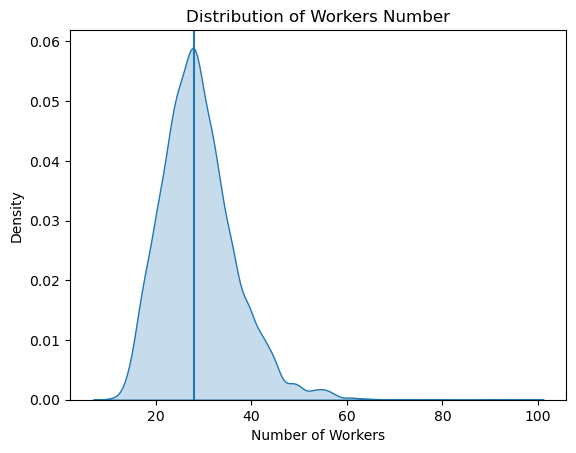

In [11]:
sns.kdeplot(df['workers_num'],fill=True)
plt.axvline(28)
plt.title("Distribution of Workers Number")
plt.ylabel('Density')
plt.xlabel('Number of Workers')
plt.show()


Filled missing values in the workers_num column using the median value to maintain data consistency without being skewed by outliers.

In [12]:
df['workers_num']=df['workers_num'].fillna(df['workers_num'].median())

Checked the dataset for missing values in each column to identify columns that require further cleaning.

In [13]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

Dropped the 'wh_est_year' , 'WH_Manager_ID', 'Ware_house_ID' column due to a large number of missing values, making it unsuitable for modeling

In [14]:
df.drop(columns='wh_est_year',inplace=True)


In [15]:
df.drop(columns=['WH_Manager_ID','Ware_house_ID'])

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,...,0,1,203,28.0,22,1,A+,2,4,29138
22146,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,...,0,0,170,28.0,26,0,C,5,9,33108
22147,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,0,99,22.0,20,0,B+,6,4,24072
22148,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,...,0,0,220,17.0,13,0,B,3,28,15055


Checked value counts for the approved_wh_govt_certificate column to understand class distribution before filling nulls.

In [16]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: count, dtype: int64

Visualized the distribution of the approved_wh_govt_certificate values using a histogram for better understanding of its frequency.

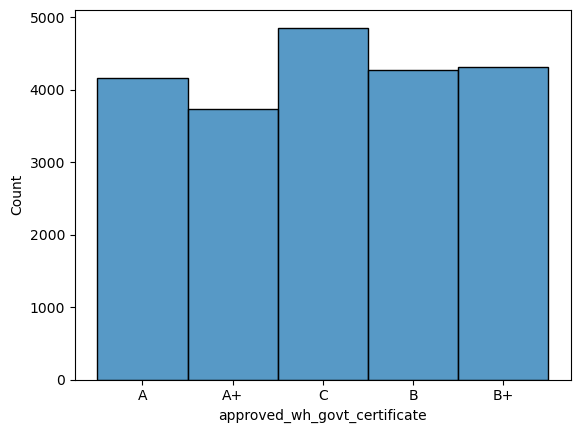

In [17]:
sns.histplot(df['approved_wh_govt_certificate'])
plt.show()

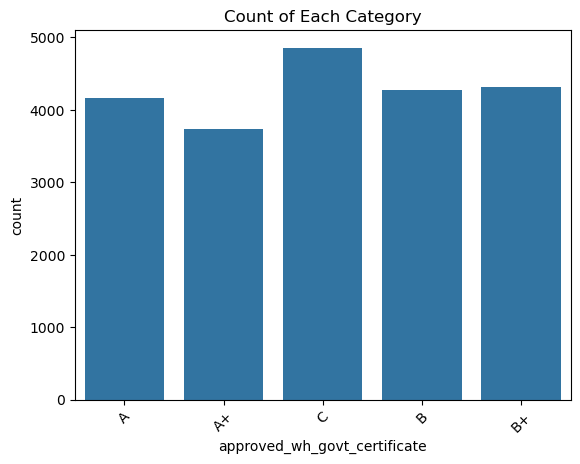

In [18]:
sns.countplot(x='approved_wh_govt_certificate', data=df)
plt.title('Count of Each Category')
plt.xticks(rotation=45) 
plt.show()

Filled missing values in the approved_wh_govt_certificate column using its mode, which is 'C', to reduce data loss.

In [19]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [20]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna('C')

Confirmed that all missing values in approved_wh_govt_certificate have been successfully filled.

In [21]:
df['approved_wh_govt_certificate'].isnull().sum()

np.int64(0)

In [22]:
Categorical_data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Ware_house_ID']=le.fit_transform(df['Ware_house_ID'])
df['WH_Manager_ID']=le.fit_transform(df['WH_Manager_ID'])
df['Location_type']=le.fit_transform(df['Location_type'])
df['WH_capacity_size']=le.fit_transform(df['WH_capacity_size'])
df['zone']=le.fit_transform(df['zone'])
df['WH_regional_zone']=le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type']=le.fit_transform(df['wh_owner_type'])
df['approved_wh_govt_certificate']=le.fit_transform(df['approved_wh_govt_certificate'])

Used LabelEncoder to convert categorical text data into numerical form for machine learning model compatibility.

In [24]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,2,3,5,3,1,2,4651,...,1,1,91,29.0,13,0,0,5,15,17115
1,1,1,0,0,1,4,0,0,4,6217,...,0,1,210,31.0,4,0,0,3,17,5074
2,2,2,0,1,2,1,1,0,4,4306,...,0,0,161,37.0,17,0,0,6,22,23137
3,3,3,0,1,1,2,7,4,2,6000,...,0,0,103,21.0,17,1,1,3,27,22115
4,4,4,0,0,1,4,3,1,2,4740,...,0,1,112,25.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,22145,22145,0,0,1,5,8,1,3,5030,...,0,1,203,28.0,22,1,1,2,4,29138
22146,22146,22146,0,2,2,5,3,1,3,4320,...,0,0,170,28.0,26,0,4,5,9,33108
22147,22147,22147,0,0,1,5,7,2,2,5268,...,0,0,99,22.0,20,0,3,6,4,24072
22148,22148,22148,0,0,1,5,6,2,4,4378,...,0,0,220,17.0,13,0,2,3,28,15055


In [25]:
# Univariate Analysis

from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Ware_house_ID,0.0,22149.0,11074.500000,0.0,5537.25,16611.75,11074.50,6394.298567,0.000000,-1.200000,No Outliers
1,WH_Manager_ID,0.0,22149.0,11074.500000,0.0,5537.25,16611.75,11074.50,6394.298567,0.000000,-1.200000,No Outliers
2,Location_type,0.0,1.0,0.081986,0.0,0.00,0.00,0.00,0.274350,3.047573,7.288361,Has Outliers
3,WH_capacity_size,0.0,2.0,0.788352,0.0,0.00,1.00,1.00,0.743864,0.362418,-1.126213,No Outliers
4,zone,0.0,3.0,1.874582,1.0,1.00,3.00,2.00,0.883875,0.097053,-1.421213,No Outliers
5,WH_regional_zone,0.0,5.0,3.247404,5.0,2.00,5.00,3.00,1.669796,-0.544420,-0.980799,No Outliers
6,num_refill_req_l3m,0.0,8.0,4.097020,5.0,2.00,6.00,4.00,2.606289,-0.081390,-1.218193,No Outliers
7,transport_issue_l1y,0.0,5.0,0.777201,0.0,0.00,1.00,1.00,1.201747,1.605424,1.820683,Has Outliers
8,Competitor_in_mkt,0.0,12.0,3.103928,2.0,2.00,4.00,2.00,1.142886,0.985102,1.798511,Has Outliers
9,retail_shop_num,1821.0,11008.0,4983.115711,4808.0,4309.25,5499.00,1189.75,1050.634225,0.905324,1.846915,Has Outliers


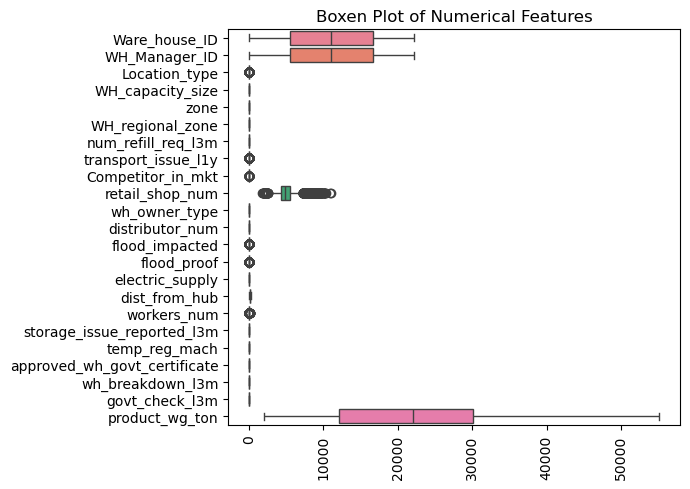

In [26]:
# Checking BoxenPlot 
plt.figure(figsize=(7, 5))
sns.boxplot(data= df,orient='h')

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

# Capping the Outliers

In [27]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'Ware_house_ID'.
No outliers found in 'WH_Manager_ID'.
Replaced 1816 outliers in 'Location_type' with median.
No outliers found in 'WH_capacity_size'.
No outliers found in 'zone'.
No outliers found in 'WH_regional_zone'.
No outliers found in 'num_refill_req_l3m'.
Replaced 2628 outliers in 'transport_issue_l1y' with median.
Replaced 85 outliers in 'Competitor_in_mkt' with median.
Replaced 825 outliers in 'retail_shop_num' with median.
No outliers found in 'wh_owner_type'.
No outliers found in 'distributor_num'.
Replaced 2186 outliers in 'flood_impacted' with median.
Replaced 1207 outliers in 'flood_proof' with median.
No outliers found in 'electric_supply'.
No outliers found in 'dist_from_hub'.
Replaced 533 outliers in 'workers_num' with median.
No outliers found in 'storage_issue_reported_l3m'.
No outliers found in 'temp_reg_mach'.
No outliers found in 'approved_wh_govt_certificate'.
No outliers found in 'wh_breakdown_l3m'.
No outliers found in 'govt_check_l3m'.
No

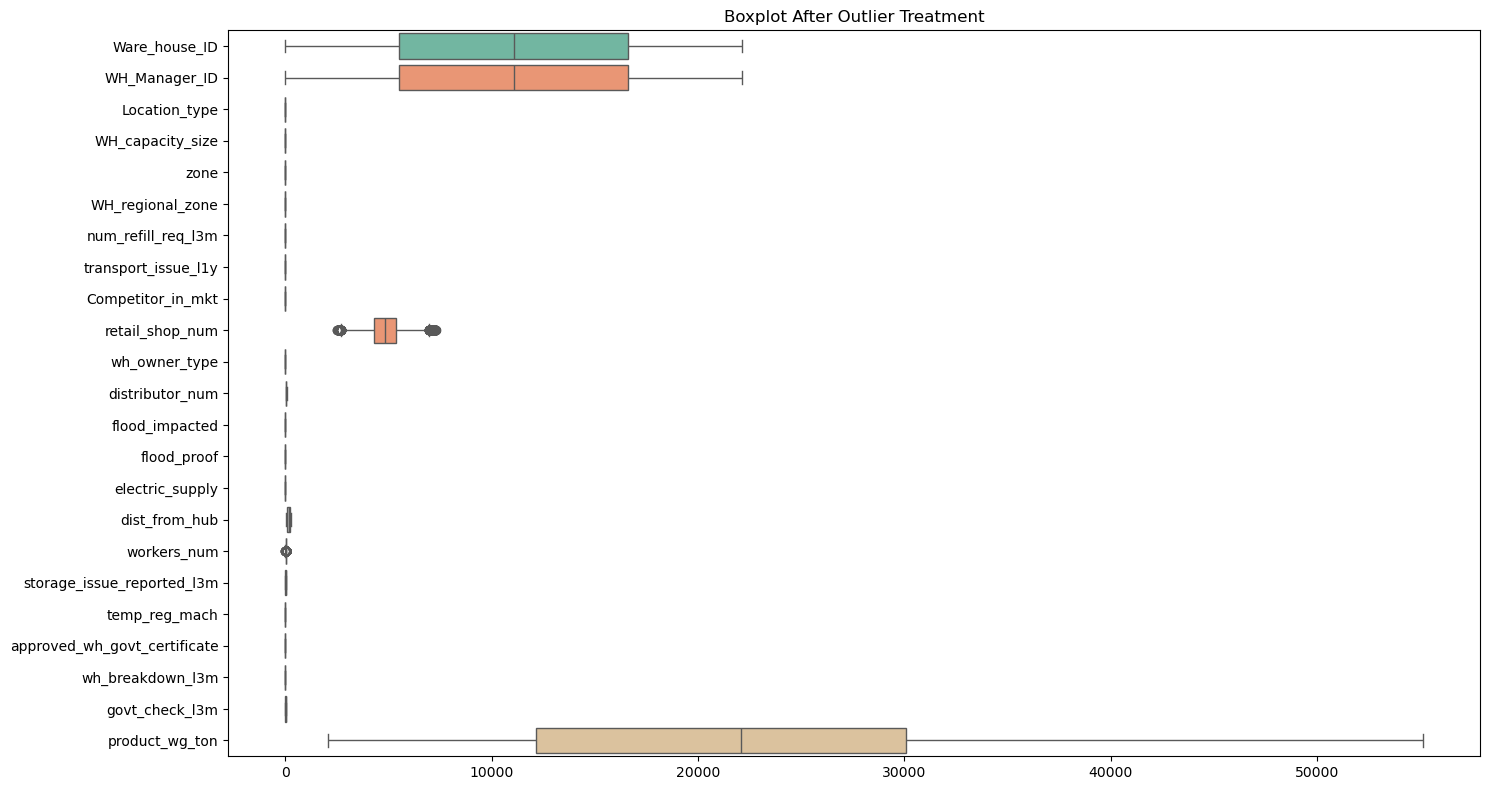

In [28]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

# **variance_inflation_factor** 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# Checking VIF:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('product_wg_ton',axis = 1))

,features,VIF_Values
0,Ware_house_ID,inf
1,WH_Manager_ID,inf
9,retail_shop_num,24.36
16,workers_num,19.51
8,Competitor_in_mkt,8.56
11,distributor_num,7.49
15,dist_from_hub,7.37
5,WH_regional_zone,6.07
20,wh_breakdown_l3m,6.07
21,govt_check_l3m,5.88


Applied Principal Component Analysis (PCA) to reduce dimensionality and extract most relevant features for modeling.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
# Using PCA Concept:

# Step 1: Standardize the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['product_wg_ton'], how = 'left')

pca_df

Explained Variance Ratio: [0.14495476 0.25914017 0.35127748 0.44002649 0.52125399 0.59427233
 0.6466102  0.69671201 0.74358787 0.78817105 0.82980232 0.87068826
 0.90796167]
Number of components selected: 13


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,product_wg_ton
0,0.190601,-0.175965,0.020254,0.668408,-0.692939,-0.471739,0.364583,0.650618,0.070193,-0.036188,-0.144091,-0.485808,-0.140874,17115
1,-0.585781,-0.325704,-0.450887,-0.165225,-0.661836,-0.307233,0.418599,0.000120,-0.682568,-0.185397,-0.029865,0.195111,-0.169899,5074
2,0.041459,-0.157064,0.509193,-0.613400,-0.755274,-0.727157,0.120856,-0.116252,-0.293674,-0.084041,0.346783,0.161428,0.228169,23137
3,0.892340,0.786025,0.147507,-0.063593,-0.712990,0.079691,0.132639,-0.420494,-0.257557,0.216916,0.219673,-0.202308,-0.067138,22115
4,-0.551806,-0.374513,-0.463789,-0.183103,-0.665849,0.029342,0.057177,-0.369965,0.568163,-0.165744,0.154496,-0.168696,0.004328,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0.210296,0.800570,-0.636775,0.404662,0.790133,0.137135,0.206820,0.300678,0.147255,0.226228,-0.011000,0.146569,-0.429168,29138
22146,0.815562,-0.400997,0.389458,-0.061929,0.671450,-0.029669,-0.302199,0.328818,0.624247,-0.198113,0.311161,0.167263,-0.458958,33108
22147,0.090950,-0.198636,-0.163164,-0.958397,0.716072,0.021660,0.224170,0.265849,0.892934,0.293364,0.550932,-0.104869,-0.368694,24072
22148,0.866791,-0.297790,-0.411527,-0.372632,0.765868,0.162937,0.750539,-0.033093,0.452282,0.271180,-0.216365,0.151203,-0.051656,15055


Split the dataset into training and test sets (70% train, 30% test) for model evaluation.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,minmax_scale,StandardScaler

X=pca_df.drop(columns='product_wg_ton')
y=pca_df["product_wg_ton"]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70)

# **Random Forest Regressor**

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

from sklearn.metrics import r2_score

r2_score_rf=r2_score(y_pred_rf,y_test)

r2_score_rf

0.8033548017205007

# **Applying KFold Technique**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Initialize the model
rf = RandomForestRegressor()

# Perform 5-fold cross-validation and get R² scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Print individual fold scores
print("Cross-validation R² scores for each fold:", cv_scores)

# Print the mean R² score across all folds
print("Mean R² score (5-fold):", np.mean(cv_scores))

# Optionally, fit the model on the full training set and evaluate on test set
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)
print("R² score on test set:", r2_score_rf)


Cross-validation R² scores for each fold: [0.849824   0.84406782 0.84452737 0.84517363 0.84521036]
Mean R² score (5-fold): 0.8457606363383793
R² score on test set: 0.8461993891865094


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the base model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best estimator after tuning
best_rf = random_search.best_estimator_

# Cross-validation scores with best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores for each fold:", cv_scores)
print("Mean R² score (5-fold):", np.mean(cv_scores))

# Evaluate on the test set
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)

print("Best Hyperparameters:", random_search.best_params_)
print("R² score on test set:", r2_score_rf)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross-validation R² scores for each fold: [0.82216982 0.81678536 0.81792617 0.81932696 0.82152716]
Mean R² score (5-fold): 0.8195470932429914
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
R² score on test set: 0.8177948094361717


Applied Random Forest Regressor to predict product_wg_ton and evaluated the model using R2 score

# **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeRegressor
rf=DecisionTreeRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

from sklearn.metrics import r2_score

r2_score_dtr=r2_score(y_pred_rf,y_test)

r2_score_dtr

0.6750502168777084

In [36]:
# Initialize the model
dtr = DecisionTreeRegressor()

# Perform 5-fold cross-validation on training set
cv_scores = cross_val_score(dtr, X_train, y_train, cv=5, scoring='r2')
print("5-Fold CV R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))

# Fit model and evaluate on test set
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
r2_score_dtr = r2_score(y_test, y_pred_dtr)
print("R² score on test set:", r2_score_dtr)

5-Fold CV R² Scores: [0.68947635 0.68610413 0.6678597  0.66710525 0.67507086]
Mean CV R² Score: 0.6771232560408758
R² score on test set: 0.6815823138961561


Applied Decision Tree Regressor and calculated its R2 score to compare with Random Forest performance.

# **Ransac**

In [37]:
from sklearn.linear_model import RANSACRegressor
RAN=RANSACRegressor()
RAN.fit(X_train,y_train)
y_pred_RAN=RAN.predict(X_train)

r2_score(y_train,y_pred_RAN)


0.7600493951449019

In [38]:
# Initialize the model
ran = RANSACRegressor()

# 5-Fold Cross-Validation on training set
cv_scores = cross_val_score(ran, X_train, y_train, cv=5, scoring='r2')
print("5-Fold CV R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))

# Fit the model on full training data
ran.fit(X_train, y_train)

# Predict on test set
y_pred_ran = ran.predict(X_test)

# Evaluate on test set
r2_score_ran = r2_score(y_test, y_pred_ran)
print("R² Score on Test Set:", r2_score_ran)

5-Fold CV R² Scores: [  0.7304714  -24.98928011   0.73963201   0.74147084 -25.16258368]
Mean CV R² Score: -9.588057906548887
R² Score on Test Set: 0.7511728470550751


Applied  RANSAC Regressor and calculated its R2 score to compare with Random Forest performance.

In [39]:
from sklearn.linear_model import HuberRegressor
HUB=HuberRegressor()
HUB.fit(X_train,y_train)
y_pred_HUB=HUB.predict(X_train)

r2_score(y_train,y_pred_HUB)

0.7992991728491184

Applied Huber Regressor and calculated its R2 score to compare with Random Forest performance.

In [40]:
# Initialize and fit the model
hub = HuberRegressor()
hub.fit(X_train, y_train)

# Predict on test set
y_pred_hub = hub.predict(X_test)

# R² score on test set
r2_score_hub = r2_score(y_test, y_pred_hub)
print("R² Score on Test Set:", r2_score_hub)

# 5-Fold Cross-Validation on training data
cv_scores = cross_val_score(HuberRegressor(), X_train, y_train, cv=5, scoring='r2')
print("5-Fold CV R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))

R² Score on Test Set: 0.7911331860794719
5-Fold CV R² Scores: [0.80325878 0.79794887 0.79943568 0.79719181 0.79634211]
Mean CV R² Score: 0.798835448469486


RANSAC and Huber Regressor are robust regression techniques used to reduce the impact of outliers in data. RANSAC removes outliers by fitting only on inliers, while Huber softens their influence without discarding them.

Applying Booskting Algotithm

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on training data
y_pred_xgb = xgb_model.predict(X_train)

# Evaluate using R² score
r2_score_xgb = r2_score(y_train, y_pred_xgb)
print("R² Score:", r2_score_xgb)


R² Score: 0.9657877683639526


In [42]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import r2_score
# import numpy as np

# # Initialize and fit the model
# xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
# xgb_model.fit(X_train, y_train)

# # Predict on test set
# y_pred_xgb = xgb_model.predict(X_test)

# # R² score on test set
# r2_score_xgb = r2_score(y_test, y_pred_xgb)
# print("R² Score on Test Set:", r2_score_xgb)

# # 5-Fold Cross-Validation on training data
# cv_scores_xgb = cross_val_score(
#     XGBRegressor(objective='reg:squarederror', random_state=42),
#     X_train, y_train,
#     cv=5,
#     scoring='r2'
# )
# print("5-Fold CV R² Scores:", cv_scores_xgb)
# print("Mean CV R² Score:", np.mean(cv_scores_xgb))


**XGBoost** stands for **Extreme Gradient Boosting**, a fast and powerful boosting algorithm.
It combines weak learners (like decision trees) by correcting previous errors to make accurate predictions.
Known for its speed, regularization, and outlier handling, it’s popular for both classification and regression tasks.


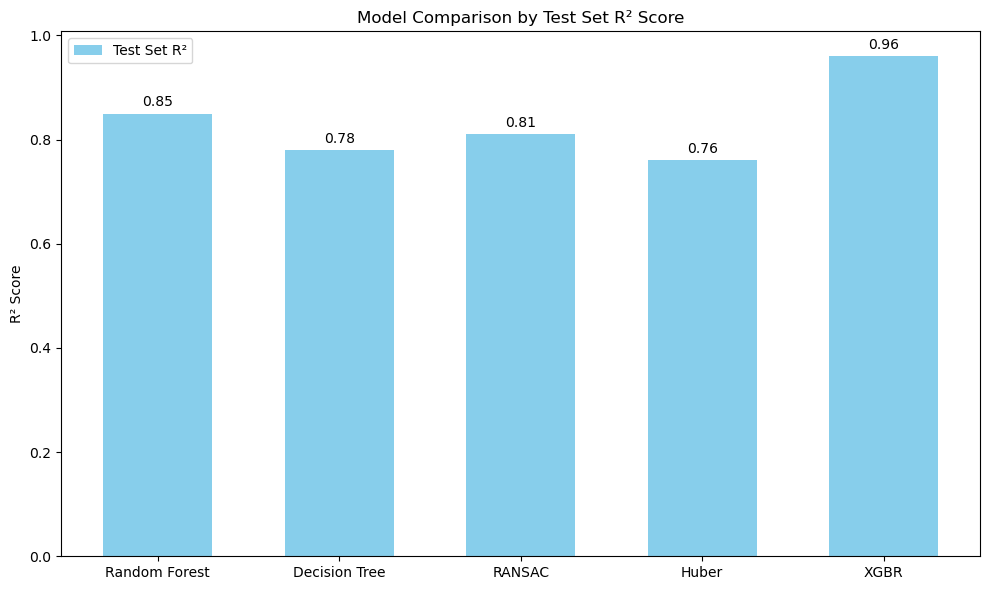

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# R² scores on test set
r2_score_rf = 0.85
r2_score_dtr = 0.78
r2_score_ran = 0.81
r2_score_hub = 0.76
r2_score_xgb = 0.96

# Model names
model_names = ['Random Forest', 'Decision Tree', 'RANSAC', 'Huber', 'XGBR']

# Test set R² scores
test_r2_scores = [r2_score_rf, r2_score_dtr, r2_score_ran, r2_score_hub, r2_score_xgb]

# Plotting
x = np.arange(len(model_names))  # the label locations
width = 0.6  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, test_r2_scores, width, label='Test Set R²', color='skyblue')

# Add labels, title, and legend
ax.set_ylabel('R² Score')
ax.set_title('Model Comparison by Test Set R² Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
